In [99]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

SEED = 472889135
RNG = np.random.default_rng(SEED)

plt.style.use('e3mlm.mplstyle')

## Bias-variance tradeoff in model assessment

In [83]:
def train_test_traj_assessment(X, y, sizes):
    train_traj = []
    test_traj = []

    for s in sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=s)
        m = SVR(kernel='rbf', gamma=5, C=10)
        m.fit(X_train, y_train)
        train_error = metrics.mean_squared_error( \
            m.predict(X_train), y_train)
        test_error = metrics.mean_squared_error( \
            m.predict(X_test), y_test)
        train_traj.append(train_error)
        test_traj.append(test_error)
    return train_traj, test_traj

sizes = np.linspace(0.01, 0.99, 99)
train_trajs = []
test_trajs = []
for _ in range(100):
    X, y = get_X_y(100)
    train_tr, test_tr = train_test_traj_assessment(X, y, sizes)
    train_trajs.append(train_tr)
    test_trajs.append(test_tr)

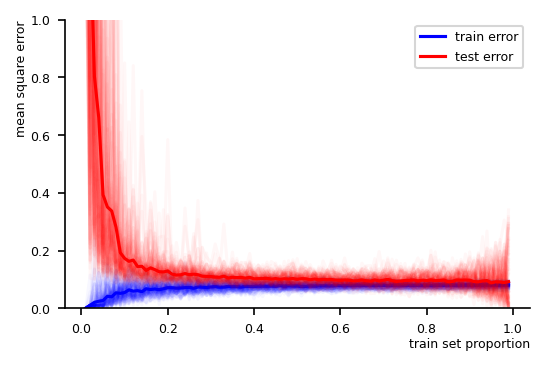

In [92]:
for t in train_trajs:
    plt.plot(sizes, t, c='b', alpha=0.03)

plt.plot(sizes, np.mean(train_trajs, axis=0), c='b', label='train error')

for t in test_trajs:
    plt.plot(sizes, t, c='r', alpha=0.03)

plt.plot(sizes, np.mean(test_trajs, axis=0), c='r', label='test error')

plt.ylim(0, 1)
plt.xlabel('train set proportion')
plt.ylabel('mean square error')
plt.legend()

plt.show()

## Effect of sampling on data distribution

In [100]:
def data_density(data):
    fig, ax = plt.subplots(1, 1, figsize=(2, 3))
    sns.kdeplot(x=data.T[0], y=data.T[1], ax=ax)
    plt.show()

In [101]:
def split_density(data, train_size=0.7):
    data_train, data_test = train_test_split(data, train_size=train_size)

    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    sns.kdeplot(x=data_train.T[0], y=data_train.T[1], ax=axes[0])
    axes[0].set_xlabel(f'train ({int(100*train_size)}%)')
    sns.kdeplot(x=data_test.T[0], y=data_test.T[1], ax=axes[1])
    axes[1].set_xlabel(f'test ({int(100*(1-train_size))}%)')
    plt.show()

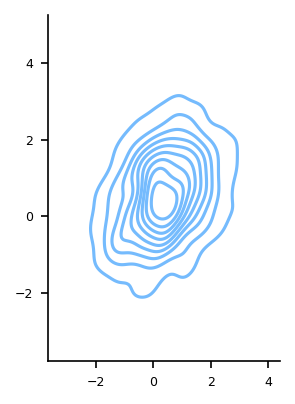

In [109]:
data = RNG.multivariate_normal(mean=[.4, .6], cov=[[1, .3], [.3, 1]],
                               size=1000)
data_density(data)

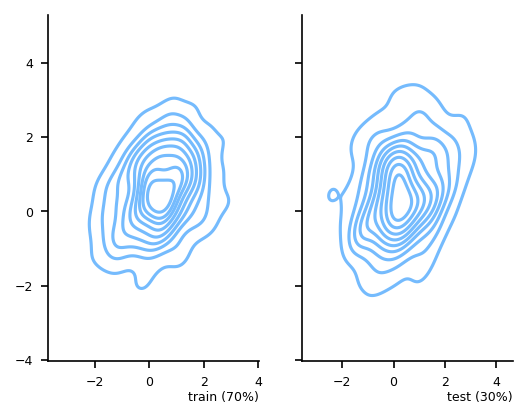

In [111]:
split_density(data)

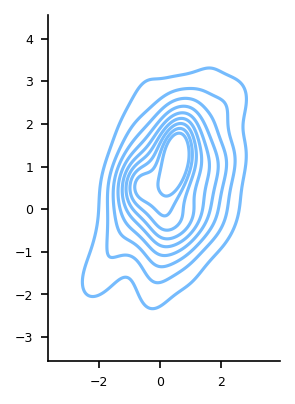

In [104]:
data = RNG.multivariate_normal(mean=[.4, .6], cov=[[1, .3], [.3, 1]], size=100)
data_density(data)

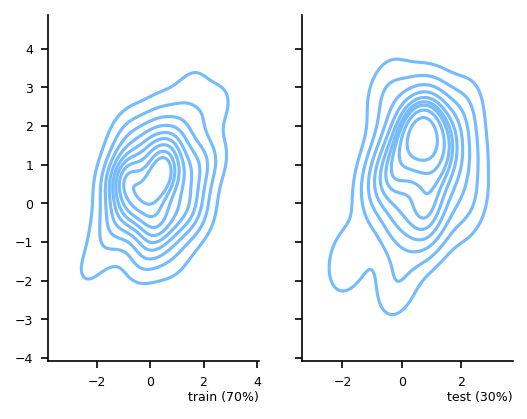

In [105]:
split_density(data)

## Bias-variance tradeoff in model selection

In [93]:
x = RNG.random(size=50)
y = 4 * x - 2 + RNG.random(size=50)

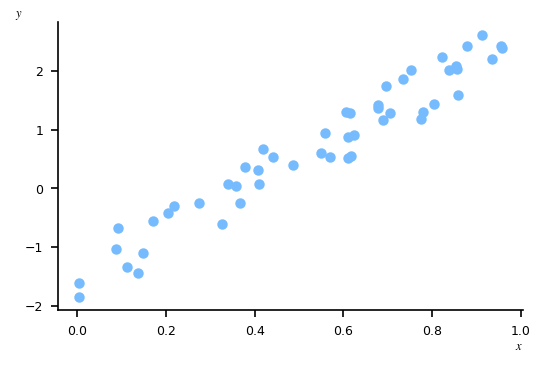

In [94]:
plt.plot(x, y, 'o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', rotation='horizontal')
plt.show()

In [95]:
def train_test_error(X_train, y_train, X_test, y_test, gamma):
    m = SVR(kernel='rbf', gamma=gamma, C=10)
    m.fit(X_train, y_train)
    train_error = metrics.mean_squared_error(m.predict(X_train), y_train)
    test_error = metrics.mean_squared_error(m.predict(X_test), y_test)
    return train_error, test_error

In [96]:
def train_test_trajectory(X_train, y_train, X_test, y_test, gammas):
    return np.array([train_test_error(X_train, y_train, X_test, y_test, g)
                     for g in gammas]).T

In [97]:
def get_X_y(n):
    X = RNG.random(size=n)
    y = 4 * X - 2 + RNG.random(size=n)
    return np.expand_dims(X, axis=1), y

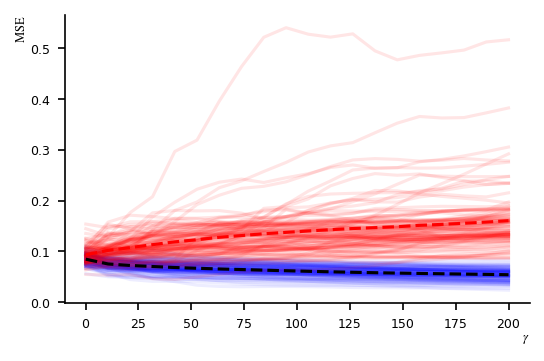

In [98]:
gammas = np.linspace(0.1, 200, 20)
train_trajs = []
test_trajs = []
for _ in range(100):
    X_train, y_train = get_X_y(50)
    X_test, y_test = get_X_y(50)
    train_tr, test_tr = train_test_trajectory(X_train, y_train,
                                              X_test, y_test, gammas)
    train_trajs.append(train_tr)
    test_trajs.append(test_tr)

for t in train_trajs:
    plt.plot(gammas, t, c='b', alpha=0.07)

for t in test_trajs:
    plt.plot(gammas, t, c='r', alpha=0.1)

plt.plot(gammas, np.mean(train_trajs, axis=0), '--', c='k')
plt.plot(gammas, np.mean(test_trajs, axis=0), '--', c='r')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\mathrm{MSE}$')

plt.show()